<h1>Task 1

**Describa un algoritmo para generar V**

    Algoritmo GenerarV():
        Generar dos números aleatorios U1 y U2, uniformemente distribuidos en [0, 1].
        
        Definir una lista de probabilidades p_i para cada valor posible xi de V.
        Definir una lista de funciones de probabilidad acumulada F_i para cada valor posible xi de V.

        Inicializar i = 1
        Mientras U1 > Σ(p_i * F_i(xi)):
            Incrementar i en 1
        Fin Mientras

        Asignar V = xi (el valor correspondiente a i)

    Fin Algoritmo


Para demostrar que el algoritmo genera adecuadamente V, es decir, que sigue la función de probabilidad acumulada F(x) y la distribución de probabilidad adecuada p_i para cada xi, podemos usar la propiedad de que los números aleatorios U1 y U2 están uniformemente distribuidos entre 0 y 1.

Cuando el algoritmo elige un valor V = xi, eso significa que la probabilidad de que el número aleatorio U1 esté en un cierto rango específico es exactamente igual a la probabilidad p_i asociada con ese valor xi. Como U1 está distribuido uniformemente entre 0 y 1, el algoritmo selecciona cada posible valor xi con la probabilidad correcta p_i que queremos para V.

Además, la suma acumulada de las probabilidades Σ(p_i * F_i(xi)) es igual a la función de probabilidad acumulada deseada F(xi) para V. Esto asegura que el algoritmo elija los valores de V de acuerdo con la función de probabilidad acumulada F(x) que queremos generar. *(Referencia - Simulation Modeling and Analysis" de Averill M. Law y W. David Kelton)*

En resumen, el algoritmo genera adecuadamente V porque selecciona los valores de acuerdo con la probabilidad acumulada F(x) y sigue la distribución adecuada p_i para cada xi.

<h1>Task 2

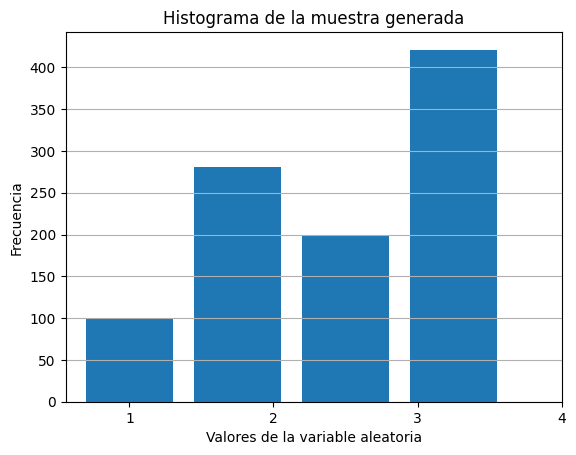

In [50]:
import random
import matplotlib.pyplot as plt

def generar_variable_aleatoria(funcion_masa_probabilidad):
    n = len(funcion_masa_probabilidad)
    acumulada = [0] * n

    acumulada[0] = funcion_masa_probabilidad[0]
    for i in range(1, n):
        acumulada[i] = acumulada[i - 1] + funcion_masa_probabilidad[i]

    U1 = random.random()
    for i in range(n):
        if U1 <= acumulada[i]:
            return i + 1  

funcion_masa_probabilidad_ejemplo = [0.1, 0.3, 0.2, 0.4]

# Generamos una muestra de 1000 valores aleatorios usando la función de masa de probabilidad
muestra = [generar_variable_aleatoria(funcion_masa_probabilidad_ejemplo) for _ in range(1000)]


plt.hist(muestra, bins=len(funcion_masa_probabilidad_ejemplo), align='left', rwidth=0.8)
plt.xticks(range(1, len(funcion_masa_probabilidad_ejemplo) + 1))
plt.xlabel('Valores de la variable aleatoria')
plt.ylabel('Frecuencia')
plt.title('Histograma de la muestra generada')
plt.grid(axis='y')
plt.show()


<h1>Task 3


Realice tres simulaciones para determinar cuál de los proyectos es el más rentable. Utilice 100, 1,000 y
10,000 iteraciones


In [51]:
proyecto_hotel = [
    -800,
    (-800, 50),
    (-800, 100),
    (-700, 150),
    (300, 200),
    (400, 200),
    (500, 200),
    (200, 8440)
]

proyecto_centro_comercial = [
    -900,
    (-600, 50),
    (-200, 50),
    (-600, 100),
    (250, 150),
    (350, 150),
    (400, 150),
    (1600, 6000)
]

**Tasa de descuento**

In [52]:
tasa_descuento = 0.10  

In [53]:
#Generar variable aleatoria
def generar_variable_aleatoria(distribucion):
    if isinstance(distribucion, tuple):
        return random.normalvariate(distribucion[0], distribucion[1])
    else:
        return distribucion

def calcular_vpn(flujos_caja, tasa_descuento):
    vpn = 0
    for i, flujo in enumerate(flujos_caja):
        vpn += flujo / ((1 + tasa_descuento) ** i)
    return vpn

def getVPN(distribuciones, tasa_descuento, iteraciones):
    vpns = []
    for _ in range(iteraciones):
        flujos_caja_simulados = [generar_variable_aleatoria(distribucion) for distribucion in distribuciones]
        vpn = calcular_vpn(flujos_caja_simulados, tasa_descuento)
        vpns.append(vpn)
    return vpns



In [54]:
def Simular(n_iteraciones):
    vpns_hotel = getVPN(proyecto_hotel, tasa_descuento, n_iteraciones)
    vpns_centro_comercial = getVPN(proyecto_centro_comercial, tasa_descuento, n_iteraciones)

    vpn_promedio_hotel = sum(vpns_hotel) / len(vpns_hotel)
    vpn_promedio_centro_comercial = sum(vpns_centro_comercial) / len(vpns_centro_comercial)

    print(f"VPN promedio Hotel: {vpn_promedio_hotel}")
    print(f"VPN promedio Centro Comercial: {vpn_promedio_centro_comercial}")

    if vpn_promedio_hotel > vpn_promedio_centro_comercial:
        print("Es mejor invertir en el Hotel")
    else:
        print("\nEs mejor invertir en el <Centro Comercial>")

**100 Iteraciones**

In [55]:
Simular(100)

VPN promedio Hotel: -2327.0996546583647
VPN promedio Centro Comercial: -398.391470230002

Es mejor invertir en el <Centro Comercial>


**1,000 Iteraciones**

In [56]:
Simular(1000)

VPN promedio Hotel: -1884.6010025616836
VPN promedio Centro Comercial: -638.0363280120451

Es mejor invertir en el <Centro Comercial>


**10,000 Iteraciones**

In [57]:
Simular(1000)

VPN promedio Hotel: -1999.5765708137073
VPN promedio Centro Comercial: -535.3067468304996

Es mejor invertir en el <Centro Comercial>


Como el VPN promedio en todas las simulaciones es menor para el proyecto del centro comercial, es mejor opcion inverti en dicho proyecto. 